### Can we classify the banknote as fake or genuine?

### Libraries

In [4]:
# Install the required libraries
# ! py -m pip install pyforest

Using legacy setup.py install for pyforest, since package 'wheel' is not installed.
    Running setup.py install for pyforest: started
    Running setup.py install for pyforest: finished with status 'done'


In [24]:
from pyforest import *
import warnings

warnings.filterwarnings('ignore')

In [8]:
# To see all the
imports
lazy_imports()

['from sklearn.ensemble import GradientBoostingClassifier',
 'import pandas as pd',
 'import sklearn',
 'import datetime as dt',
 'import tqdm',
 'from pathlib import Path',
 'from sklearn.ensemble import RandomForestClassifier',
 'import sys',
 'from pyspark import SparkContext',
 'import altair as alt',
 'import keras',
 'import nltk',
 'import xgboost as xgb',
 'import numpy as np',
 'import gensim',
 'import dash',
 'from openpyxl import load_workbook',
 'import awswrangler as wr',
 'import plotly.express as px',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import pydot',
 'from sklearn.manifold import TSNE',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import pickle',
 'import re',
 'import lightgbm as lgb',
 'import matplotlib.pyplot as plt',
 'import tensorflow as tf',
 'import glob',
 'import plotly as py',
 'from sklearn.model_selection import train_test_split',
 'from sklearn import svm',

### Data Sourcing

In [9]:
# loading the data using pandas
df = pd.read_csv('D:/github/1-DataSets/banknoteAnalysis/BankNote_Authentication.csv')

<IPython.core.display.Javascript object>

In [10]:
# looking at first 5 rows of the data
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [12]:
# Strucutre of the data
df.shape

(1372, 5)

In [15]:
# Distribution of target variable
df['class'].value_counts()  # Our data set is not imbalanced

0    762
1    610
Name: class, dtype: int64

In [16]:
# Checking for null values
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [17]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

### Visuization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of "Class" Attribute')

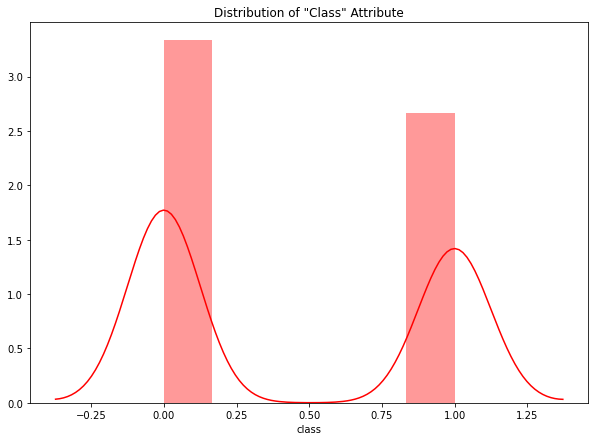

In [19]:
plt.figure(figsize=(10,7))
sns.distplot(df['class'],
            color='red')
plt.title('Distribution of "Class" Attribute')

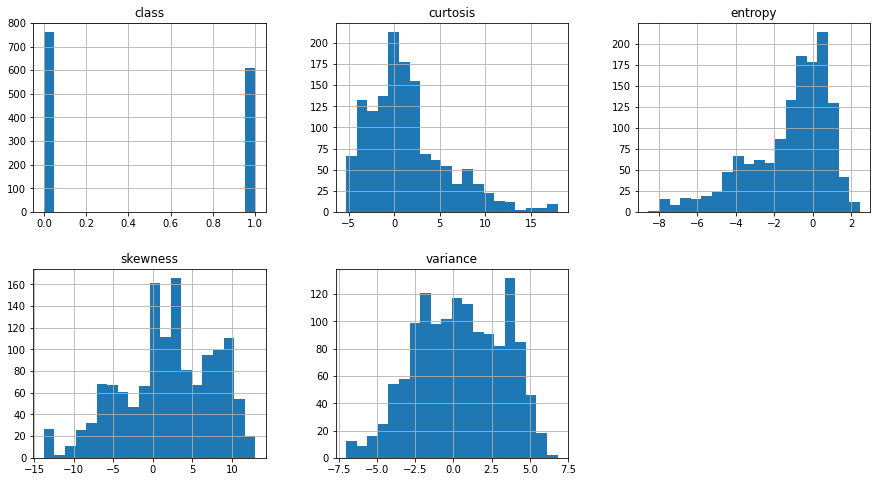

In [21]:
df.hist(bins=20,
       figsize=(15,8),
        layout=(2,3));

<IPython.core.display.Javascript object>

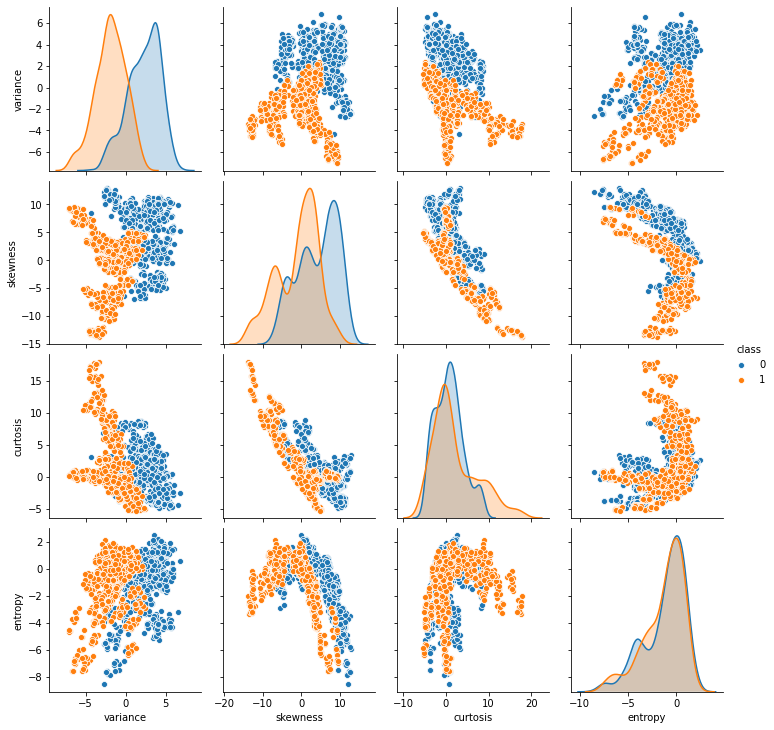

In [25]:
sns.pairplot(df,
            hue='class')

### Preparing our Data to build our Model

In [26]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
# Classifiying the data into target and independent variable
X = df.drop('class',
            axis=1)
y = df['class']

In [29]:
# Splitting the data into train and test (80-20 %)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

<IPython.core.display.Javascript object>

In [32]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

### Modelling

#### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [87]:
classifier = LogisticRegression(solver='liblinear',
                               random_state=1)
classifier.fit(X_train,
               y_train)
accuracies = cross_val_score(estimator=classifier,
                            X = X_train,
                            y=y_train,
                            cv=10)

In [88]:
print('Accuracies:\n',accuracies )
print('Mean Accuracy: ',accuracies.mean())

Accuracies:
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy:  0.9835863219349459


In [89]:
classifier_pred = classifier.predict(X_test)
classifier_pred[1:5]

array([0, 1, 1, 0], dtype=int64)

In [90]:
cm = confusion_matrix(y_test,
                      classifier_pred,
                      labels=[0,1])
df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

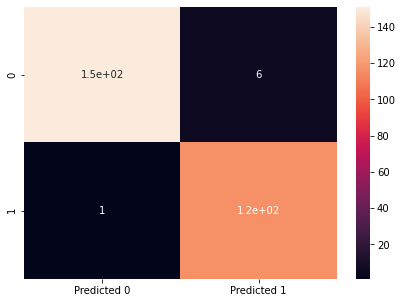

In [91]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,
           annot=True)

#### Support Vector Machine - Linear

In [92]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state=1,
         kernel='linear')

svm_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [93]:
svm_accuracies = cross_val_score(estimator=svm_classifier,
                            X = X_train,
                            y=y_train,
                            cv=10)


In [97]:
print('Accuracies:\n',svm_accuracies)
print('Mean Accuracy:',svm_accuracies.mean())

Accuracies:
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]
Mean Accuracy: 0.9854045037531277


In [98]:
y_pred = svm_classifier.predict(X_test)

y_pred[1:5]

array([0, 1, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

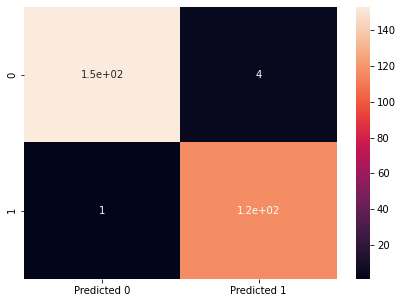

In [99]:
svm_cm = confusion_matrix(y_test,
                      y_pred,
                      labels=[0,1])
df_cm = pd.DataFrame(svm_cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,
           annot=True)

#### SVM-RBF

In [100]:
from sklearn.svm import SVC

rbf_classifier = SVC(random_state=1,
         kernel='rbf')

rbf_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [101]:
rbf_accuracies = cross_val_score(estimator=rbf_classifier,
                            X = X_train,
                            y=y_train,
                            cv=10)


In [102]:
print('Accuracies:\n',rbf_accuracies)
print('Mean Accuracy:',rbf_accuracies.mean())

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [103]:
y_pred = rbf_classifier.predict(X_test)

y_pred[1:5]

array([0, 1, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

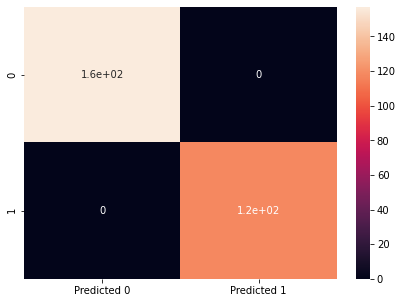

In [104]:
rbf_cm = confusion_matrix(y_test,
                      y_pred,
                      labels=[0,1])
df_cm = pd.DataFrame(rbf_cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,
           annot=True)

#### Random forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf_classifier = RandomForestClassifier(n_estimators=50,
                                      criterion='entropy',
                                      random_state=0)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [107]:
rf_accuracies = cross_val_score(estimator=rf_classifier,
                            X = X_train,
                            y=y_train,
                            cv=10)

In [108]:
print('Accuracies:\n',rf_accuracies)
print('Mean Accuracy:',rf_accuracies.mean())

Accuracies:
 [0.98181818 1.         0.99090909 0.99090909 1.         0.99090909
 1.         1.         1.         1.        ]
Mean Accuracy: 0.9954545454545455


In [109]:
y_pred = rf_classifier.predict(X_test)

y_pred[1:5]

array([0, 1, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

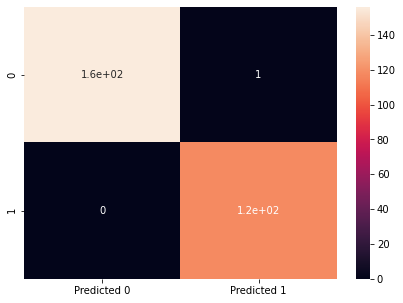

In [110]:
rf_cm = confusion_matrix(y_test,
                      y_pred,
                      labels=[0,1])
df_cm = pd.DataFrame(rf_cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,
           annot=True)

#### KNeighborsClassifier

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

In [112]:
param_grid = {'leaf_size':[2,5,7,9,11],
             'n_neighbors':[2,5,7,9,11],
             'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(),
                   param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [114]:
knn_classifier = KNeighborsClassifier(n_neighbors=2,
                                     p=1,
                                     leaf_size=2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [115]:
knn_accuracies = cross_val_score(estimator=knn_classifier,
                            X = X_train,
                            y=y_train,
                            cv=10)

In [116]:
print('Accuracies:\n',knn_accuracies)
print('Mean Accuracy:',knn_accuracies.mean())

Accuracies:
 [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]
Mean Accuracy: 0.9972727272727273


In [117]:
y_pred = knn_classifier.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

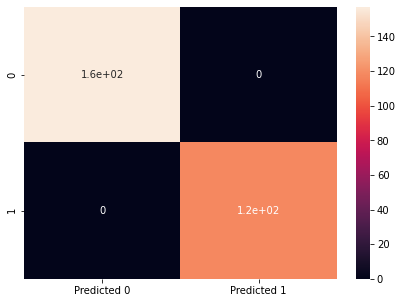

In [118]:
knn_cm = confusion_matrix(y_test,
                      y_pred,
                      labels=[0,1])
df_cm = pd.DataFrame(knn_cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,
           annot=True)

#### Multi-Layer Perception

In [81]:
from sklearn.neural_network import MLPClassifier

In [83]:
multi_classifier = MLPClassifier(hidden_layer_sizes=(8,4),
                                max_iter=8000,
                                alpha=0.0001,
                                solver='sgd',
                                verbose=10,
                                random_state=21,
                                tol=0.000000001)
multi_classifier.fit(X_train,
                    y_train)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

Iteration 297, loss = 0.03589386
Iteration 298, loss = 0.03576305
Iteration 299, loss = 0.03563450
Iteration 300, loss = 0.03550705
Iteration 301, loss = 0.03537878
Iteration 302, loss = 0.03525408
Iteration 303, loss = 0.03513394
Iteration 304, loss = 0.03500536
Iteration 305, loss = 0.03488854
Iteration 306, loss = 0.03476340
Iteration 307, loss = 0.03464008
Iteration 308, loss = 0.03451699
Iteration 309, loss = 0.03439868
Iteration 310, loss = 0.03427191
Iteration 311, loss = 0.03415465
Iteration 312, loss = 0.03403997
Iteration 313, loss = 0.03392635
Iteration 314, loss = 0.03380769
Iteration 315, loss = 0.03369144
Iteration 316, loss = 0.03358002
Iteration 317, loss = 0.03347190
Iteration 318, loss = 0.03335779
Iteration 319, loss = 0.03324726
Iteration 320, loss = 0.03313638
Iteration 321, loss = 0.03302853
Iteration 322, loss = 0.03292591
Iteration 323, loss = 0.03282288
Iteration 324, loss = 0.03270784
Iteration 325, loss = 0.03260314
Iteration 326, loss = 0.03250024
Iteration 

Iteration 586, loss = 0.01774634
Iteration 587, loss = 0.01771389
Iteration 588, loss = 0.01767803
Iteration 589, loss = 0.01764657
Iteration 590, loss = 0.01761433
Iteration 591, loss = 0.01758391
Iteration 592, loss = 0.01754953
Iteration 593, loss = 0.01751858
Iteration 594, loss = 0.01748727
Iteration 595, loss = 0.01745831
Iteration 596, loss = 0.01742434
Iteration 597, loss = 0.01739413
Iteration 598, loss = 0.01736417
Iteration 599, loss = 0.01733121
Iteration 600, loss = 0.01729865
Iteration 601, loss = 0.01726958
Iteration 602, loss = 0.01723837
Iteration 603, loss = 0.01720527
Iteration 604, loss = 0.01717424
Iteration 605, loss = 0.01714486
Iteration 606, loss = 0.01711229
Iteration 607, loss = 0.01708218
Iteration 608, loss = 0.01705083
Iteration 609, loss = 0.01702263
Iteration 610, loss = 0.01699120
Iteration 611, loss = 0.01695992
Iteration 612, loss = 0.01693077
Iteration 613, loss = 0.01690197
Iteration 614, loss = 0.01686854
Iteration 615, loss = 0.01684227
Iteration 

Iteration 854, loss = 0.01150046
Iteration 855, loss = 0.01148492
Iteration 856, loss = 0.01146729
Iteration 857, loss = 0.01145094
Iteration 858, loss = 0.01143427
Iteration 859, loss = 0.01141891
Iteration 860, loss = 0.01140181
Iteration 861, loss = 0.01138655
Iteration 862, loss = 0.01137042
Iteration 863, loss = 0.01135512
Iteration 864, loss = 0.01133880
Iteration 865, loss = 0.01132327
Iteration 866, loss = 0.01130722
Iteration 867, loss = 0.01129266
Iteration 868, loss = 0.01127582
Iteration 869, loss = 0.01125958
Iteration 870, loss = 0.01124374
Iteration 871, loss = 0.01122876
Iteration 872, loss = 0.01121267
Iteration 873, loss = 0.01119623
Iteration 874, loss = 0.01118026
Iteration 875, loss = 0.01116548
Iteration 876, loss = 0.01114772
Iteration 877, loss = 0.01113357
Iteration 878, loss = 0.01111710
Iteration 879, loss = 0.01110136
Iteration 880, loss = 0.01108546
Iteration 881, loss = 0.01106938
Iteration 882, loss = 0.01105404
Iteration 883, loss = 0.01103946
Iteration 

Iteration 1121, loss = 0.00808235
Iteration 1122, loss = 0.00807332
Iteration 1123, loss = 0.00806372
Iteration 1124, loss = 0.00805375
Iteration 1125, loss = 0.00804597
Iteration 1126, loss = 0.00803500
Iteration 1127, loss = 0.00802409
Iteration 1128, loss = 0.00801534
Iteration 1129, loss = 0.00800672
Iteration 1130, loss = 0.00799550
Iteration 1131, loss = 0.00798627
Iteration 1132, loss = 0.00797773
Iteration 1133, loss = 0.00796721
Iteration 1134, loss = 0.00795763
Iteration 1135, loss = 0.00794846
Iteration 1136, loss = 0.00794020
Iteration 1137, loss = 0.00793093
Iteration 1138, loss = 0.00791993
Iteration 1139, loss = 0.00791131
Iteration 1140, loss = 0.00790067
Iteration 1141, loss = 0.00789180
Iteration 1142, loss = 0.00788189
Iteration 1143, loss = 0.00787288
Iteration 1144, loss = 0.00786309
Iteration 1145, loss = 0.00785338
Iteration 1146, loss = 0.00784472
Iteration 1147, loss = 0.00783608
Iteration 1148, loss = 0.00782631
Iteration 1149, loss = 0.00781754
Iteration 1150

Iteration 1386, loss = 0.00602344
Iteration 1387, loss = 0.00601679
Iteration 1388, loss = 0.00601072
Iteration 1389, loss = 0.00600435
Iteration 1390, loss = 0.00599918
Iteration 1391, loss = 0.00599284
Iteration 1392, loss = 0.00598714
Iteration 1393, loss = 0.00598115
Iteration 1394, loss = 0.00597500
Iteration 1395, loss = 0.00596903
Iteration 1396, loss = 0.00596267
Iteration 1397, loss = 0.00595680
Iteration 1398, loss = 0.00595021
Iteration 1399, loss = 0.00594577
Iteration 1400, loss = 0.00593956
Iteration 1401, loss = 0.00593365
Iteration 1402, loss = 0.00592789
Iteration 1403, loss = 0.00592205
Iteration 1404, loss = 0.00591623
Iteration 1405, loss = 0.00591022
Iteration 1406, loss = 0.00590474
Iteration 1407, loss = 0.00589913
Iteration 1408, loss = 0.00589387
Iteration 1409, loss = 0.00588741
Iteration 1410, loss = 0.00588122
Iteration 1411, loss = 0.00587566
Iteration 1412, loss = 0.00586993
Iteration 1413, loss = 0.00586458
Iteration 1414, loss = 0.00585843
Iteration 1415

Iteration 1675, loss = 0.00463629
Iteration 1676, loss = 0.00463277
Iteration 1677, loss = 0.00462894
Iteration 1678, loss = 0.00462474
Iteration 1679, loss = 0.00462118
Iteration 1680, loss = 0.00461748
Iteration 1681, loss = 0.00461324
Iteration 1682, loss = 0.00460991
Iteration 1683, loss = 0.00460639
Iteration 1684, loss = 0.00460245
Iteration 1685, loss = 0.00459816
Iteration 1686, loss = 0.00459451
Iteration 1687, loss = 0.00459105
Iteration 1688, loss = 0.00458702
Iteration 1689, loss = 0.00458354
Iteration 1690, loss = 0.00457979
Iteration 1691, loss = 0.00457593
Iteration 1692, loss = 0.00457208
Iteration 1693, loss = 0.00456836
Iteration 1694, loss = 0.00456488
Iteration 1695, loss = 0.00456138
Iteration 1696, loss = 0.00455789
Iteration 1697, loss = 0.00455357
Iteration 1698, loss = 0.00454965
Iteration 1699, loss = 0.00454593
Iteration 1700, loss = 0.00454276
Iteration 1701, loss = 0.00453882
Iteration 1702, loss = 0.00453536
Iteration 1703, loss = 0.00453146
Iteration 1704

Iteration 1956, loss = 0.00374533
Iteration 1957, loss = 0.00374252
Iteration 1958, loss = 0.00373992
Iteration 1959, loss = 0.00373733
Iteration 1960, loss = 0.00373462
Iteration 1961, loss = 0.00373199
Iteration 1962, loss = 0.00372929
Iteration 1963, loss = 0.00372692
Iteration 1964, loss = 0.00372422
Iteration 1965, loss = 0.00372156
Iteration 1966, loss = 0.00371908
Iteration 1967, loss = 0.00371657
Iteration 1968, loss = 0.00371405
Iteration 1969, loss = 0.00371170
Iteration 1970, loss = 0.00370938
Iteration 1971, loss = 0.00370671
Iteration 1972, loss = 0.00370388
Iteration 1973, loss = 0.00370187
Iteration 1974, loss = 0.00369902
Iteration 1975, loss = 0.00369630
Iteration 1976, loss = 0.00369354
Iteration 1977, loss = 0.00369109
Iteration 1978, loss = 0.00368853
Iteration 1979, loss = 0.00368592
Iteration 1980, loss = 0.00368307
Iteration 1981, loss = 0.00368052
Iteration 1982, loss = 0.00367823
Iteration 1983, loss = 0.00367562
Iteration 1984, loss = 0.00367307
Iteration 1985

Iteration 2230, loss = 0.00312604
Iteration 2231, loss = 0.00312416
Iteration 2232, loss = 0.00312241
Iteration 2233, loss = 0.00312037
Iteration 2234, loss = 0.00311830
Iteration 2235, loss = 0.00311637
Iteration 2236, loss = 0.00311442
Iteration 2237, loss = 0.00311286
Iteration 2238, loss = 0.00311061
Iteration 2239, loss = 0.00310873
Iteration 2240, loss = 0.00310674
Iteration 2241, loss = 0.00310470
Iteration 2242, loss = 0.00310268
Iteration 2243, loss = 0.00310101
Iteration 2244, loss = 0.00309896
Iteration 2245, loss = 0.00309717
Iteration 2246, loss = 0.00309526
Iteration 2247, loss = 0.00309317
Iteration 2248, loss = 0.00309121
Iteration 2249, loss = 0.00308940
Iteration 2250, loss = 0.00308779
Iteration 2251, loss = 0.00308570
Iteration 2252, loss = 0.00308383
Iteration 2253, loss = 0.00308194
Iteration 2254, loss = 0.00308013
Iteration 2255, loss = 0.00307831
Iteration 2256, loss = 0.00307636
Iteration 2257, loss = 0.00307447
Iteration 2258, loss = 0.00307254
Iteration 2259

Iteration 2508, loss = 0.00266628
Iteration 2509, loss = 0.00266499
Iteration 2510, loss = 0.00266374
Iteration 2511, loss = 0.00266222
Iteration 2512, loss = 0.00266109
Iteration 2513, loss = 0.00265934
Iteration 2514, loss = 0.00265799
Iteration 2515, loss = 0.00265658
Iteration 2516, loss = 0.00265563
Iteration 2517, loss = 0.00265373
Iteration 2518, loss = 0.00265242
Iteration 2519, loss = 0.00265094
Iteration 2520, loss = 0.00264980
Iteration 2521, loss = 0.00264851
Iteration 2522, loss = 0.00264687
Iteration 2523, loss = 0.00264575
Iteration 2524, loss = 0.00264412
Iteration 2525, loss = 0.00264315
Iteration 2526, loss = 0.00264128
Iteration 2527, loss = 0.00263997
Iteration 2528, loss = 0.00263881
Iteration 2529, loss = 0.00263726
Iteration 2530, loss = 0.00263604
Iteration 2531, loss = 0.00263475
Iteration 2532, loss = 0.00263333
Iteration 2533, loss = 0.00263201
Iteration 2534, loss = 0.00263043
Iteration 2535, loss = 0.00262912
Iteration 2536, loss = 0.00262777
Iteration 2537

Iteration 2750, loss = 0.00236242
Iteration 2751, loss = 0.00236133
Iteration 2752, loss = 0.00236024
Iteration 2753, loss = 0.00235906
Iteration 2754, loss = 0.00235801
Iteration 2755, loss = 0.00235702
Iteration 2756, loss = 0.00235577
Iteration 2757, loss = 0.00235443
Iteration 2758, loss = 0.00235318
Iteration 2759, loss = 0.00235256
Iteration 2760, loss = 0.00235109
Iteration 2761, loss = 0.00234987
Iteration 2762, loss = 0.00234905
Iteration 2763, loss = 0.00234774
Iteration 2764, loss = 0.00234657
Iteration 2765, loss = 0.00234553
Iteration 2766, loss = 0.00234461
Iteration 2767, loss = 0.00234330
Iteration 2768, loss = 0.00234205
Iteration 2769, loss = 0.00234105
Iteration 2770, loss = 0.00233988
Iteration 2771, loss = 0.00233879
Iteration 2772, loss = 0.00233770
Iteration 2773, loss = 0.00233659
Iteration 2774, loss = 0.00233552
Iteration 2775, loss = 0.00233434
Iteration 2776, loss = 0.00233320
Iteration 2777, loss = 0.00233206
Iteration 2778, loss = 0.00233093
Iteration 2779

Iteration 3014, loss = 0.00209230
Iteration 3015, loss = 0.00209141
Iteration 3016, loss = 0.00209054
Iteration 3017, loss = 0.00208984
Iteration 3018, loss = 0.00208863
Iteration 3019, loss = 0.00208777
Iteration 3020, loss = 0.00208675
Iteration 3021, loss = 0.00208586
Iteration 3022, loss = 0.00208514
Iteration 3023, loss = 0.00208415
Iteration 3024, loss = 0.00208311
Iteration 3025, loss = 0.00208239
Iteration 3026, loss = 0.00208135
Iteration 3027, loss = 0.00208042
Iteration 3028, loss = 0.00207952
Iteration 3029, loss = 0.00207862
Iteration 3030, loss = 0.00207755
Iteration 3031, loss = 0.00207675
Iteration 3032, loss = 0.00207590
Iteration 3033, loss = 0.00207496
Iteration 3034, loss = 0.00207425
Iteration 3035, loss = 0.00207298
Iteration 3036, loss = 0.00207211
Iteration 3037, loss = 0.00207122
Iteration 3038, loss = 0.00207040
Iteration 3039, loss = 0.00206942
Iteration 3040, loss = 0.00206858
Iteration 3041, loss = 0.00206772
Iteration 3042, loss = 0.00206685
Iteration 3043

Iteration 3292, loss = 0.00186221
Iteration 3293, loss = 0.00186140
Iteration 3294, loss = 0.00186074
Iteration 3295, loss = 0.00186007
Iteration 3296, loss = 0.00185917
Iteration 3297, loss = 0.00185851
Iteration 3298, loss = 0.00185774
Iteration 3299, loss = 0.00185705
Iteration 3300, loss = 0.00185630
Iteration 3301, loss = 0.00185573
Iteration 3302, loss = 0.00185472
Iteration 3303, loss = 0.00185403
Iteration 3304, loss = 0.00185337
Iteration 3305, loss = 0.00185254
Iteration 3306, loss = 0.00185193
Iteration 3307, loss = 0.00185118
Iteration 3308, loss = 0.00185039
Iteration 3309, loss = 0.00184986
Iteration 3310, loss = 0.00184892
Iteration 3311, loss = 0.00184821
Iteration 3312, loss = 0.00184753
Iteration 3313, loss = 0.00184693
Iteration 3314, loss = 0.00184601
Iteration 3315, loss = 0.00184529
Iteration 3316, loss = 0.00184452
Iteration 3317, loss = 0.00184393
Iteration 3318, loss = 0.00184310
Iteration 3319, loss = 0.00184239
Iteration 3320, loss = 0.00184151
Iteration 3321

Iteration 3536, loss = 0.00169521
Iteration 3537, loss = 0.00169453
Iteration 3538, loss = 0.00169391
Iteration 3539, loss = 0.00169329
Iteration 3540, loss = 0.00169264
Iteration 3541, loss = 0.00169201
Iteration 3542, loss = 0.00169139
Iteration 3543, loss = 0.00169075
Iteration 3544, loss = 0.00169014
Iteration 3545, loss = 0.00168959
Iteration 3546, loss = 0.00168898
Iteration 3547, loss = 0.00168825
Iteration 3548, loss = 0.00168808
Iteration 3549, loss = 0.00168710
Iteration 3550, loss = 0.00168639
Iteration 3551, loss = 0.00168583
Iteration 3552, loss = 0.00168524
Iteration 3553, loss = 0.00168455
Iteration 3554, loss = 0.00168401
Iteration 3555, loss = 0.00168350
Iteration 3556, loss = 0.00168274
Iteration 3557, loss = 0.00168211
Iteration 3558, loss = 0.00168147
Iteration 3559, loss = 0.00168087
Iteration 3560, loss = 0.00168025
Iteration 3561, loss = 0.00167970
Iteration 3562, loss = 0.00167897
Iteration 3563, loss = 0.00167840
Iteration 3564, loss = 0.00167786
Iteration 3565

Iteration 3823, loss = 0.00153044
Iteration 3824, loss = 0.00152997
Iteration 3825, loss = 0.00152940
Iteration 3826, loss = 0.00152890
Iteration 3827, loss = 0.00152837
Iteration 3828, loss = 0.00152783
Iteration 3829, loss = 0.00152725
Iteration 3830, loss = 0.00152677
Iteration 3831, loss = 0.00152623
Iteration 3832, loss = 0.00152572
Iteration 3833, loss = 0.00152520
Iteration 3834, loss = 0.00152463
Iteration 3835, loss = 0.00152417
Iteration 3836, loss = 0.00152359
Iteration 3837, loss = 0.00152306
Iteration 3838, loss = 0.00152254
Iteration 3839, loss = 0.00152200
Iteration 3840, loss = 0.00152156
Iteration 3841, loss = 0.00152093
Iteration 3842, loss = 0.00152050
Iteration 3843, loss = 0.00151989
Iteration 3844, loss = 0.00151942
Iteration 3845, loss = 0.00151889
Iteration 3846, loss = 0.00151833
Iteration 3847, loss = 0.00151777
Iteration 3848, loss = 0.00151725
Iteration 3849, loss = 0.00151677
Iteration 3850, loss = 0.00151631
Iteration 3851, loss = 0.00151570
Iteration 3852

Iteration 4069, loss = 0.00141018
Iteration 4070, loss = 0.00140979
Iteration 4071, loss = 0.00140933
Iteration 4072, loss = 0.00140879
Iteration 4073, loss = 0.00140838
Iteration 4074, loss = 0.00140797
Iteration 4075, loss = 0.00140748
Iteration 4076, loss = 0.00140701
Iteration 4077, loss = 0.00140657
Iteration 4078, loss = 0.00140606
Iteration 4079, loss = 0.00140577
Iteration 4080, loss = 0.00140521
Iteration 4081, loss = 0.00140474
Iteration 4082, loss = 0.00140433
Iteration 4083, loss = 0.00140385
Iteration 4084, loss = 0.00140338
Iteration 4085, loss = 0.00140289
Iteration 4086, loss = 0.00140251
Iteration 4087, loss = 0.00140202
Iteration 4088, loss = 0.00140160
Iteration 4089, loss = 0.00140116
Iteration 4090, loss = 0.00140071
Iteration 4091, loss = 0.00140025
Iteration 4092, loss = 0.00139977
Iteration 4093, loss = 0.00139936
Iteration 4094, loss = 0.00139891
Iteration 4095, loss = 0.00139851
Iteration 4096, loss = 0.00139809
Iteration 4097, loss = 0.00139760
Iteration 4098

Iteration 4317, loss = 0.00130511
Iteration 4318, loss = 0.00130474
Iteration 4319, loss = 0.00130431
Iteration 4320, loss = 0.00130386
Iteration 4321, loss = 0.00130346
Iteration 4322, loss = 0.00130309
Iteration 4323, loss = 0.00130273
Iteration 4324, loss = 0.00130233
Iteration 4325, loss = 0.00130190
Iteration 4326, loss = 0.00130148
Iteration 4327, loss = 0.00130116
Iteration 4328, loss = 0.00130073
Iteration 4329, loss = 0.00130037
Iteration 4330, loss = 0.00129996
Iteration 4331, loss = 0.00129966
Iteration 4332, loss = 0.00129918
Iteration 4333, loss = 0.00129879
Iteration 4334, loss = 0.00129852
Iteration 4335, loss = 0.00129804
Iteration 4336, loss = 0.00129768
Iteration 4337, loss = 0.00129728
Iteration 4338, loss = 0.00129694
Iteration 4339, loss = 0.00129652
Iteration 4340, loss = 0.00129616
Iteration 4341, loss = 0.00129570
Iteration 4342, loss = 0.00129538
Iteration 4343, loss = 0.00129506
Iteration 4344, loss = 0.00129456
Iteration 4345, loss = 0.00129417
Iteration 4346

Iteration 4600, loss = 0.00120063
Iteration 4601, loss = 0.00120037
Iteration 4602, loss = 0.00119996
Iteration 4603, loss = 0.00119964
Iteration 4604, loss = 0.00119935
Iteration 4605, loss = 0.00119905
Iteration 4606, loss = 0.00119864
Iteration 4607, loss = 0.00119831
Iteration 4608, loss = 0.00119798
Iteration 4609, loss = 0.00119765
Iteration 4610, loss = 0.00119733
Iteration 4611, loss = 0.00119696
Iteration 4612, loss = 0.00119659
Iteration 4613, loss = 0.00119631
Iteration 4614, loss = 0.00119596
Iteration 4615, loss = 0.00119560
Iteration 4616, loss = 0.00119522
Iteration 4617, loss = 0.00119492
Iteration 4618, loss = 0.00119462
Iteration 4619, loss = 0.00119428
Iteration 4620, loss = 0.00119386
Iteration 4621, loss = 0.00119361
Iteration 4622, loss = 0.00119330
Iteration 4623, loss = 0.00119289
Iteration 4624, loss = 0.00119257
Iteration 4625, loss = 0.00119228
Iteration 4626, loss = 0.00119185
Iteration 4627, loss = 0.00119161
Iteration 4628, loss = 0.00119123
Iteration 4629

Iteration 4844, loss = 0.00112240
Iteration 4845, loss = 0.00112203
Iteration 4846, loss = 0.00112177
Iteration 4847, loss = 0.00112145
Iteration 4848, loss = 0.00112115
Iteration 4849, loss = 0.00112085
Iteration 4850, loss = 0.00112056
Iteration 4851, loss = 0.00112026
Iteration 4852, loss = 0.00111998
Iteration 4853, loss = 0.00111966
Iteration 4854, loss = 0.00111937
Iteration 4855, loss = 0.00111911
Iteration 4856, loss = 0.00111879
Iteration 4857, loss = 0.00111843
Iteration 4858, loss = 0.00111816
Iteration 4859, loss = 0.00111785
Iteration 4860, loss = 0.00111753
Iteration 4861, loss = 0.00111727
Iteration 4862, loss = 0.00111690
Iteration 4863, loss = 0.00111660
Iteration 4864, loss = 0.00111634
Iteration 4865, loss = 0.00111597
Iteration 4866, loss = 0.00111567
Iteration 4867, loss = 0.00111541
Iteration 4868, loss = 0.00111504
Iteration 4869, loss = 0.00111474
Iteration 4870, loss = 0.00111445
Iteration 4871, loss = 0.00111412
Iteration 4872, loss = 0.00111388
Iteration 4873

Iteration 5132, loss = 0.00104077
Iteration 5133, loss = 0.00104048
Iteration 5134, loss = 0.00104025
Iteration 5135, loss = 0.00103993
Iteration 5136, loss = 0.00103967
Iteration 5137, loss = 0.00103942
Iteration 5138, loss = 0.00103916
Iteration 5139, loss = 0.00103885
Iteration 5140, loss = 0.00103868
Iteration 5141, loss = 0.00103837
Iteration 5142, loss = 0.00103811
Iteration 5143, loss = 0.00103786
Iteration 5144, loss = 0.00103764
Iteration 5145, loss = 0.00103731
Iteration 5146, loss = 0.00103706
Iteration 5147, loss = 0.00103679
Iteration 5148, loss = 0.00103654
Iteration 5149, loss = 0.00103629
Iteration 5150, loss = 0.00103608
Iteration 5151, loss = 0.00103579
Iteration 5152, loss = 0.00103548
Iteration 5153, loss = 0.00103522
Iteration 5154, loss = 0.00103496
Iteration 5155, loss = 0.00103472
Iteration 5156, loss = 0.00103445
Iteration 5157, loss = 0.00103417
Iteration 5158, loss = 0.00103398
Iteration 5159, loss = 0.00103374
Iteration 5160, loss = 0.00103346
Iteration 5161

Iteration 5380, loss = 0.00097589
Iteration 5381, loss = 0.00097561
Iteration 5382, loss = 0.00097542
Iteration 5383, loss = 0.00097510
Iteration 5384, loss = 0.00097487
Iteration 5385, loss = 0.00097461
Iteration 5386, loss = 0.00097440
Iteration 5387, loss = 0.00097414
Iteration 5388, loss = 0.00097389
Iteration 5389, loss = 0.00097368
Iteration 5390, loss = 0.00097342
Iteration 5391, loss = 0.00097321
Iteration 5392, loss = 0.00097294
Iteration 5393, loss = 0.00097272
Iteration 5394, loss = 0.00097250
Iteration 5395, loss = 0.00097217
Iteration 5396, loss = 0.00097197
Iteration 5397, loss = 0.00097170
Iteration 5398, loss = 0.00097142
Iteration 5399, loss = 0.00097121
Iteration 5400, loss = 0.00097096
Iteration 5401, loss = 0.00097070
Iteration 5402, loss = 0.00097051
Iteration 5403, loss = 0.00097028
Iteration 5404, loss = 0.00097000
Iteration 5405, loss = 0.00096973
Iteration 5406, loss = 0.00096950
Iteration 5407, loss = 0.00096927
Iteration 5408, loss = 0.00096904
Iteration 5409

Iteration 5648, loss = 0.00091363
Iteration 5649, loss = 0.00091343
Iteration 5650, loss = 0.00091317
Iteration 5651, loss = 0.00091294
Iteration 5652, loss = 0.00091274
Iteration 5653, loss = 0.00091251
Iteration 5654, loss = 0.00091230
Iteration 5655, loss = 0.00091207
Iteration 5656, loss = 0.00091185
Iteration 5657, loss = 0.00091166
Iteration 5658, loss = 0.00091140
Iteration 5659, loss = 0.00091125
Iteration 5660, loss = 0.00091099
Iteration 5661, loss = 0.00091077
Iteration 5662, loss = 0.00091059
Iteration 5663, loss = 0.00091035
Iteration 5664, loss = 0.00091016
Iteration 5665, loss = 0.00090992
Iteration 5666, loss = 0.00090971
Iteration 5667, loss = 0.00090950
Iteration 5668, loss = 0.00090931
Iteration 5669, loss = 0.00090908
Iteration 5670, loss = 0.00090889
Iteration 5671, loss = 0.00090864
Iteration 5672, loss = 0.00090844
Iteration 5673, loss = 0.00090822
Iteration 5674, loss = 0.00090801
Iteration 5675, loss = 0.00090777
Iteration 5676, loss = 0.00090754
Iteration 5677

Iteration 5896, loss = 0.00086254
Iteration 5897, loss = 0.00086236
Iteration 5898, loss = 0.00086225
Iteration 5899, loss = 0.00086196
Iteration 5900, loss = 0.00086178
Iteration 5901, loss = 0.00086157
Iteration 5902, loss = 0.00086135
Iteration 5903, loss = 0.00086116
Iteration 5904, loss = 0.00086097
Iteration 5905, loss = 0.00086079
Iteration 5906, loss = 0.00086061
Iteration 5907, loss = 0.00086041
Iteration 5908, loss = 0.00086022
Iteration 5909, loss = 0.00086005
Iteration 5910, loss = 0.00085986
Iteration 5911, loss = 0.00085963
Iteration 5912, loss = 0.00085947
Iteration 5913, loss = 0.00085925
Iteration 5914, loss = 0.00085908
Iteration 5915, loss = 0.00085887
Iteration 5916, loss = 0.00085868
Iteration 5917, loss = 0.00085854
Iteration 5918, loss = 0.00085831
Iteration 5919, loss = 0.00085812
Iteration 5920, loss = 0.00085793
Iteration 5921, loss = 0.00085775
Iteration 5922, loss = 0.00085754
Iteration 5923, loss = 0.00085738
Iteration 5924, loss = 0.00085720
Iteration 5925

Iteration 6172, loss = 0.00081212
Iteration 6173, loss = 0.00081193
Iteration 6174, loss = 0.00081176
Iteration 6175, loss = 0.00081157
Iteration 6176, loss = 0.00081140
Iteration 6177, loss = 0.00081123
Iteration 6178, loss = 0.00081102
Iteration 6179, loss = 0.00081089
Iteration 6180, loss = 0.00081068
Iteration 6181, loss = 0.00081051
Iteration 6182, loss = 0.00081035
Iteration 6183, loss = 0.00081016
Iteration 6184, loss = 0.00080998
Iteration 6185, loss = 0.00080982
Iteration 6186, loss = 0.00080961
Iteration 6187, loss = 0.00080946
Iteration 6188, loss = 0.00080930
Iteration 6189, loss = 0.00080911
Iteration 6190, loss = 0.00080893
Iteration 6191, loss = 0.00080886
Iteration 6192, loss = 0.00080859
Iteration 6193, loss = 0.00080843
Iteration 6194, loss = 0.00080829
Iteration 6195, loss = 0.00080811
Iteration 6196, loss = 0.00080793
Iteration 6197, loss = 0.00080777
Iteration 6198, loss = 0.00080761
Iteration 6199, loss = 0.00080740
Iteration 6200, loss = 0.00080728
Iteration 6201

Iteration 6433, loss = 0.00076899
Iteration 6434, loss = 0.00076885
Iteration 6435, loss = 0.00076869
Iteration 6436, loss = 0.00076851
Iteration 6437, loss = 0.00076834
Iteration 6438, loss = 0.00076821
Iteration 6439, loss = 0.00076801
Iteration 6440, loss = 0.00076789
Iteration 6441, loss = 0.00076771
Iteration 6442, loss = 0.00076755
Iteration 6443, loss = 0.00076740
Iteration 6444, loss = 0.00076722
Iteration 6445, loss = 0.00076710
Iteration 6446, loss = 0.00076690
Iteration 6447, loss = 0.00076675
Iteration 6448, loss = 0.00076659
Iteration 6449, loss = 0.00076644
Iteration 6450, loss = 0.00076625
Iteration 6451, loss = 0.00076609
Iteration 6452, loss = 0.00076595
Iteration 6453, loss = 0.00076576
Iteration 6454, loss = 0.00076562
Iteration 6455, loss = 0.00076545
Iteration 6456, loss = 0.00076531
Iteration 6457, loss = 0.00076514
Iteration 6458, loss = 0.00076497
Iteration 6459, loss = 0.00076481
Iteration 6460, loss = 0.00076466
Iteration 6461, loss = 0.00076451
Iteration 6462

Iteration 6717, loss = 0.00072611
Iteration 6718, loss = 0.00072597
Iteration 6719, loss = 0.00072582
Iteration 6720, loss = 0.00072569
Iteration 6721, loss = 0.00072558
Iteration 6722, loss = 0.00072542
Iteration 6723, loss = 0.00072528
Iteration 6724, loss = 0.00072515
Iteration 6725, loss = 0.00072500
Iteration 6726, loss = 0.00072484
Iteration 6727, loss = 0.00072472
Iteration 6728, loss = 0.00072457
Iteration 6729, loss = 0.00072445
Iteration 6730, loss = 0.00072428
Iteration 6731, loss = 0.00072414
Iteration 6732, loss = 0.00072398
Iteration 6733, loss = 0.00072385
Iteration 6734, loss = 0.00072376
Iteration 6735, loss = 0.00072358
Iteration 6736, loss = 0.00072347
Iteration 6737, loss = 0.00072328
Iteration 6738, loss = 0.00072314
Iteration 6739, loss = 0.00072305
Iteration 6740, loss = 0.00072291
Iteration 6741, loss = 0.00072273
Iteration 6742, loss = 0.00072260
Iteration 6743, loss = 0.00072248
Iteration 6744, loss = 0.00072232
Iteration 6745, loss = 0.00072217
Iteration 6746

Iteration 6963, loss = 0.00069236
Iteration 6964, loss = 0.00069223
Iteration 6965, loss = 0.00069211
Iteration 6966, loss = 0.00069197
Iteration 6967, loss = 0.00069183
Iteration 6968, loss = 0.00069171
Iteration 6969, loss = 0.00069162
Iteration 6970, loss = 0.00069144
Iteration 6971, loss = 0.00069131
Iteration 6972, loss = 0.00069121
Iteration 6973, loss = 0.00069103
Iteration 6974, loss = 0.00069090
Iteration 6975, loss = 0.00069077
Iteration 6976, loss = 0.00069063
Iteration 6977, loss = 0.00069054
Iteration 6978, loss = 0.00069039
Iteration 6979, loss = 0.00069027
Iteration 6980, loss = 0.00069014
Iteration 6981, loss = 0.00069001
Iteration 6982, loss = 0.00068989
Iteration 6983, loss = 0.00068978
Iteration 6984, loss = 0.00068959
Iteration 6985, loss = 0.00068948
Iteration 6986, loss = 0.00068935
Iteration 6987, loss = 0.00068921
Iteration 6988, loss = 0.00068907
Iteration 6989, loss = 0.00068897
Iteration 6990, loss = 0.00068885
Iteration 6991, loss = 0.00068868
Iteration 6992

Iteration 7237, loss = 0.00065746
Iteration 7238, loss = 0.00065732
Iteration 7239, loss = 0.00065727
Iteration 7240, loss = 0.00065708
Iteration 7241, loss = 0.00065699
Iteration 7242, loss = 0.00065684
Iteration 7243, loss = 0.00065672
Iteration 7244, loss = 0.00065661
Iteration 7245, loss = 0.00065646
Iteration 7246, loss = 0.00065636
Iteration 7247, loss = 0.00065625
Iteration 7248, loss = 0.00065611
Iteration 7249, loss = 0.00065601
Iteration 7250, loss = 0.00065586
Iteration 7251, loss = 0.00065575
Iteration 7252, loss = 0.00065564
Iteration 7253, loss = 0.00065552
Iteration 7254, loss = 0.00065541
Iteration 7255, loss = 0.00065527
Iteration 7256, loss = 0.00065515
Iteration 7257, loss = 0.00065503
Iteration 7258, loss = 0.00065492
Iteration 7259, loss = 0.00065479
Iteration 7260, loss = 0.00065470
Iteration 7261, loss = 0.00065457
Iteration 7262, loss = 0.00065446
Iteration 7263, loss = 0.00065431
Iteration 7264, loss = 0.00065419
Iteration 7265, loss = 0.00065408
Iteration 7266

Iteration 7484, loss = 0.00062883
Iteration 7485, loss = 0.00062872
Iteration 7486, loss = 0.00062863
Iteration 7487, loss = 0.00062850
Iteration 7488, loss = 0.00062838
Iteration 7489, loss = 0.00062827
Iteration 7490, loss = 0.00062818
Iteration 7491, loss = 0.00062807
Iteration 7492, loss = 0.00062795
Iteration 7493, loss = 0.00062783
Iteration 7494, loss = 0.00062775
Iteration 7495, loss = 0.00062761
Iteration 7496, loss = 0.00062758
Iteration 7497, loss = 0.00062738
Iteration 7498, loss = 0.00062728
Iteration 7499, loss = 0.00062716
Iteration 7500, loss = 0.00062707
Iteration 7501, loss = 0.00062696
Iteration 7502, loss = 0.00062685
Iteration 7503, loss = 0.00062682
Iteration 7504, loss = 0.00062662
Iteration 7505, loss = 0.00062651
Iteration 7506, loss = 0.00062639
Iteration 7507, loss = 0.00062630
Iteration 7508, loss = 0.00062619
Iteration 7509, loss = 0.00062610
Iteration 7510, loss = 0.00062597
Iteration 7511, loss = 0.00062588
Iteration 7512, loss = 0.00062575
Iteration 7513

Iteration 7731, loss = 0.00060264
Iteration 7732, loss = 0.00060253
Iteration 7733, loss = 0.00060243
Iteration 7734, loss = 0.00060232
Iteration 7735, loss = 0.00060221
Iteration 7736, loss = 0.00060212
Iteration 7737, loss = 0.00060203
Iteration 7738, loss = 0.00060190
Iteration 7739, loss = 0.00060181
Iteration 7740, loss = 0.00060169
Iteration 7741, loss = 0.00060161
Iteration 7742, loss = 0.00060150
Iteration 7743, loss = 0.00060140
Iteration 7744, loss = 0.00060129
Iteration 7745, loss = 0.00060119
Iteration 7746, loss = 0.00060109
Iteration 7747, loss = 0.00060099
Iteration 7748, loss = 0.00060089
Iteration 7749, loss = 0.00060078
Iteration 7750, loss = 0.00060068
Iteration 7751, loss = 0.00060058
Iteration 7752, loss = 0.00060048
Iteration 7753, loss = 0.00060038
Iteration 7754, loss = 0.00060028
Iteration 7755, loss = 0.00060018
Iteration 7756, loss = 0.00060007
Iteration 7757, loss = 0.00059998
Iteration 7758, loss = 0.00059989
Iteration 7759, loss = 0.00059978
Iteration 7760

Iteration 7975, loss = 0.00057843
Iteration 7976, loss = 0.00057834
Iteration 7977, loss = 0.00057826
Iteration 7978, loss = 0.00057816
Iteration 7979, loss = 0.00057807
Iteration 7980, loss = 0.00057797
Iteration 7981, loss = 0.00057788
Iteration 7982, loss = 0.00057778
Iteration 7983, loss = 0.00057768
Iteration 7984, loss = 0.00057760
Iteration 7985, loss = 0.00057752
Iteration 7986, loss = 0.00057741
Iteration 7987, loss = 0.00057730
Iteration 7988, loss = 0.00057722
Iteration 7989, loss = 0.00057711
Iteration 7990, loss = 0.00057704
Iteration 7991, loss = 0.00057694
Iteration 7992, loss = 0.00057684
Iteration 7993, loss = 0.00057673
Iteration 7994, loss = 0.00057665
Iteration 7995, loss = 0.00057655
Iteration 7996, loss = 0.00057644
Iteration 7997, loss = 0.00057636
Iteration 7998, loss = 0.00057628
Iteration 7999, loss = 0.00057617
Iteration 8000, loss = 0.00057608


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=8000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=10, warm_start=False)

In [84]:
y_pred = multi_classifier.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

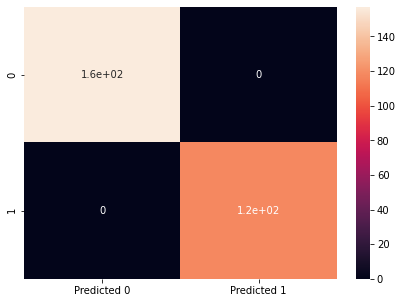

In [85]:
multi_cm = confusion_matrix(y_test,
                      y_pred,
                      labels=[0,1])
df_cm = pd.DataFrame(multi_cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,
           annot=True)

### Printing each algorithm and the accuracy score 

In [120]:
print("LogisticRegression:",accuracies.mean() )
print("Support Vector Machine (using kernel=linear):", svm_accuracies.mean())
print("Support Vector Machine (using kernel=rbf):",rbf_accuracies.mean() )
print("RandomForestClassifier:", rf_accuracies.mean())
print("KNeighborsClassifier:", knn_accuracies.mean())
print(f"MLPClassifier:",accuracy_score(y_test,multi_classifier.predict(X_test)) )

LogisticRegression: 0.9835863219349459
Support Vector Machine (using kernel=linear): 0.9854045037531277
Support Vector Machine (using kernel=rbf): 1.0
RandomForestClassifier: 0.9954545454545455
KNeighborsClassifier: 0.9972727272727273
MLPClassifier: 1.0
